In [1]:
import pandas as pd
import numpy as np
np.random.seed(1337)
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from keras import backend as K
from tensorflow import keras
from tensorflow.keras.layers import Dense
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras import backend as K
from tensorflow.keras.models import Sequential
df= pd.read_csv("Dataset/creditcard.csv")

Using TensorFlow backend.


In [2]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,279949.000000,279949.000000,279949.000000,279949.000000,279949.000000,279949.000000,279949.000000,279949.000000,279949.000000,279949.000000,...,279949.000000,279949.000000,279949.000000,279949.000000,279949.000000,279949.000000,279949.000000,279949.000000,279949.000000,279949.000000
mean,93493.773580,-0.001013,-0.005981,0.013645,0.002200,-0.004974,0.002555,-0.002103,-0.000620,-0.000111,...,-0.000277,-0.001540,-0.000762,-0.000310,0.002419,0.000037,0.000065,0.000029,88.689328,0.001743
std,46819.605382,1.956698,1.650802,1.513507,1.415784,1.379128,1.330843,1.235432,1.192263,1.100348,...,0.735580,0.724268,0.626659,0.605957,0.520459,0.482750,0.403044,0.330863,250.331097,0.041715
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,53660.000000,-0.920386,-0.602418,-0.871328,-0.848565,-0.696769,-0.765626,-0.555849,-0.207593,-0.645372,...,-0.227939,-0.540894,-0.162242,-0.354498,-0.314231,-0.327508,-0.070713,-0.052699,5.720000,0.000000
50%,83456.000000,0.019256,0.062769,0.195399,-0.015383,-0.060620,-0.270649,0.037116,0.023006,-0.052506,...,-0.029834,0.005531,-0.011919,0.041344,0.021121,-0.053060,0.001502,0.011561,22.130000,0.000000
75%,137788.000000,1.310178,0.797892,1.037772,0.749851,0.605564,0.401720,0.566616,0.327047,0.599040,...,0.184745,0.524303,0.146380,0.438032,0.352218,0.241927,0.090611,0.078041,77.890000,0.000000
max,169197.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [5]:
df['Class'].value_counts()

0.0    279461
1.0       488
Name: Class, dtype: int64

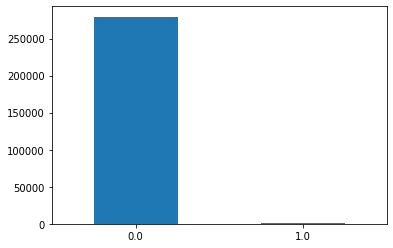

In [6]:
p = pd.value_counts(df['Class'], sort = True)
p.plot(kind = 'bar', rot=0)

IMBALANCED DATASET

In [7]:
df.shape

(284617, 31)

In [8]:
df.isnull().sum()

Time      4668
V1        4668
V2        4668
V3        4668
V4        4668
V5        4668
V6        4668
V7        4668
V8        4668
V9        4668
V10       4668
V11       4668
V12       4668
V13       4668
V14       4668
V15       4668
V16       4668
V17       4668
V18       4668
V19       4668
V20       4668
V21       4668
V22       4668
V23       4668
V24       4668
V25       4668
V26       4668
V27       4668
V28       4668
Amount    4668
Class     4668
dtype: int64

In [9]:
df.iloc[284612]    

Time     NaN
V1       NaN
V2       NaN
V3       NaN
V4       NaN
V5       NaN
V6       NaN
V7       NaN
V8       NaN
V9       NaN
V10      NaN
V11      NaN
V12      NaN
V13      NaN
V14      NaN
V15      NaN
V16      NaN
V17      NaN
V18      NaN
V19      NaN
V20      NaN
V21      NaN
V22      NaN
V23      NaN
V24      NaN
V25      NaN
V26      NaN
V27      NaN
V28      NaN
Amount   NaN
Class    NaN
Name: 284612, dtype: float64

In [10]:
df=df.dropna(axis=0)

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
df.shape

(279949, 31)

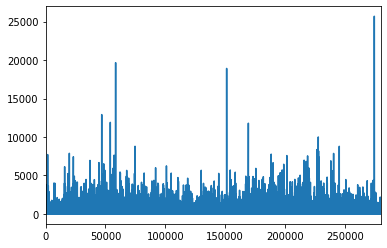

In [13]:
df['Amount'].plot()

In [14]:
Fraud = df[df['Class']==1]
Normal = df[df['Class']==0]

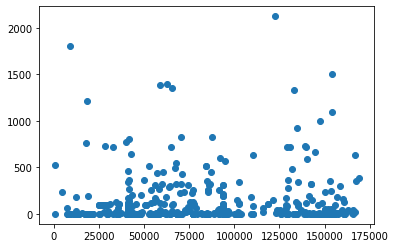

In [15]:
plt.scatter(Fraud.Time,Fraud.Amount)

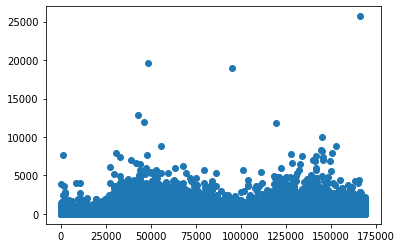

In [16]:
plt.scatter(Normal.Time,Normal.Amount)

In [17]:
scaler = MinMaxScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [18]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0.0


In [19]:
corr = df.corr()

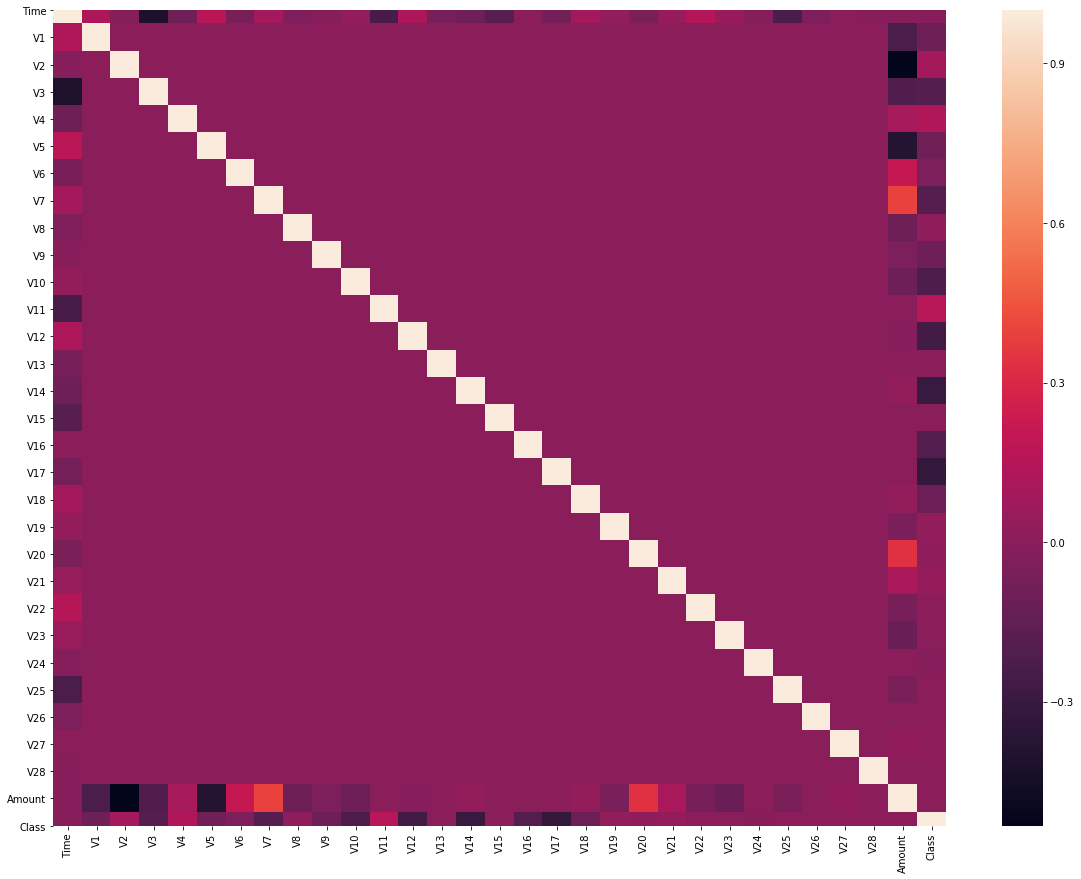

In [20]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr)

From Above heatmap-Time and Amount are not much important features for fraud

Applying upsampling of minority class

In [23]:
df=shuffle(df)

In [24]:
df_majority = df[df.Class==0]
df_minority = df[df.Class==1]

In [25]:
len(df_majority)

279461

In [26]:
len(df_minority)

488

In [27]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=100000,    # to match majority class
                                 random_state=123) # reproducible results
 

In [28]:
df_minority_upsampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
251891,155548.0,1.878230,1.325630,-2.333469,4.233151,1.355184,-0.853508,0.716025,-0.164910,-1.502345,...,-0.152131,-0.360736,0.043414,-0.242380,0.171098,-0.002601,-0.026667,0.005238,0.000275,1.0
255556,157284.0,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,-4.128505,...,0.249023,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,0.000030,1.0
234633,148053.0,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,...,0.209086,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,0.000062,1.0
154960,103808.0,-4.517344,2.500224,-4.013928,1.189452,-2.486861,-1.413476,-4.245707,1.265087,1.168828,...,1.326944,0.102999,0.508167,-0.278018,0.139721,0.064610,-0.972358,0.351360,0.000088,1.0
15781,27219.0,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,...,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,0.003892,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150661,93853.0,-6.185857,7.102985,-13.030455,8.010823,-7.885237,-3.974550,-12.229608,4.971232,-4.248307,...,2.502772,0.481691,0.480958,0.360319,-0.293354,-0.199193,-0.203917,0.398927,0.001748,1.0
254395,156710.0,0.202402,1.176270,0.346379,2.882138,1.407133,-0.504355,1.438537,-0.395603,-1.555142,...,0.242560,0.841230,-0.370157,-0.026012,0.491954,0.234576,-0.279788,-0.331933,0.000295,1.0
150665,93856.0,-6.750509,5.367416,-10.054635,9.064478,-7.968118,-2.263798,-10.317566,4.237666,-5.324109,...,1.909032,-0.348740,0.425001,0.674909,-0.784208,-0.247422,1.159581,0.197818,0.008160,1.0
135718,81372.0,-0.885254,1.790649,-0.945149,3.853433,-1.543510,0.188582,-2.988383,1.344059,-2.294535,...,0.746160,0.550802,-0.034882,-0.567608,-0.528318,0.258782,0.506893,0.176736,0.000295,1.0


In [29]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [30]:
df_upsampled.Class.value_counts()

0.0    279461
1.0    100000
Name: Class, dtype: int64

In [44]:
features=df_upsampled.iloc[:,:-1]

In [45]:
labels=df_upsampled.iloc[:,30:31]

In [46]:
features,labels=shuffle(features,labels)

In [47]:
xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.2,stratify=labels,random_state=123)

In [48]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [49]:
model = Sequential()
model.add(Dense(128, input_dim=30, activation='relu'))
#model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy',f1_m,precision_m, recall_m])
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=15,batch_size=512,verbose=1)

Train on 303568 samples, validate on 75893 samples
Epoch 1/15
303568/303568 [==============================] - 3s 9us/sample - loss: 93.8945 - acc: 0.6623 - f1_m: 0.2739 - precision_m: 0.6607 - recall_m: 0.3425 - val_loss: 74.8267 - val_acc: 0.7726 - val_f1_m: 0.2447 - val_precision_m: 0.9770 - val_recall_m: 0.1408
Epoch 2/15
303568/303568 [==============================] - 2s 8us/sample - loss: 22.2431 - acc: 0.7521 - f1_m: 0.5646 - precision_m: 0.8451 - recall_m: 0.5510 - val_loss: 35.0528 - val_acc: 0.2725 - val_f1_m: 0.4196 - val_precision_m: 0.2657 - val_recall_m: 1.0000
Epoch 3/15
303568/303568 [==============================] - 2s 8us/sample - loss: 22.1975 - acc: 0.7656 - f1_m: 0.5967 - precision_m: 0.8481 - recall_m: 0.5813 - val_loss: 12.7842 - val_acc: 0.8645 - val_f1_m: 0.6592 - val_precision_m: 0.9738 - val_recall_m: 0.4994
Epoch 4/15
303568/303568 [==============================] - 2s 8us/sample - loss: 12.1923 - acc: 0.8023 - f1_m: 0.6777 - precision_m: 0.8609 - recall_m

In [50]:
def visualize_model(history):
    plt.figure(figsize=(24,8))
    plt.subplot(1,2,1)
    plt.plot(history.history["val_acc"],label="validation_accuracy",c="red",linewidth=4)
    plt.plot(history.history["acc"],label="training_accuracy",c="green",linewidth=4)
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1,2,2)
    plt.plot(history.history["val_loss"],label="validation loss",c="red",linewidth=4)
    plt.plot(history.history["loss"],label="training_loss",c="green",linewidth=4)
    plt.legend()
    plt.grid(True)
    plt.suptitle("ACC / LOSS",fontsize=18)

    plt.show()

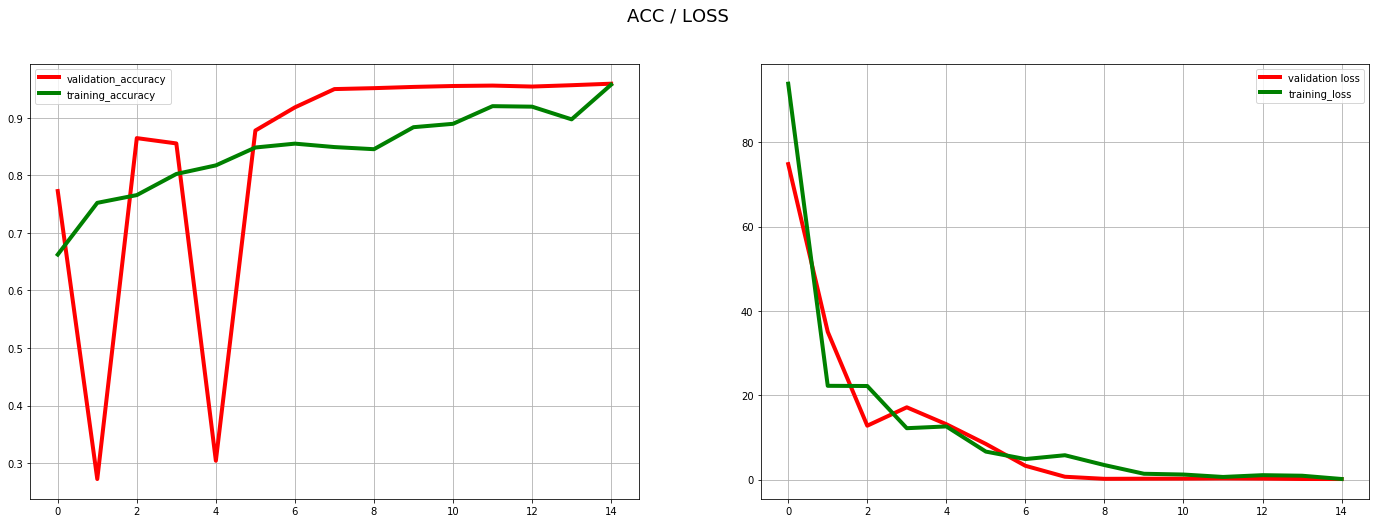

In [51]:
visualize_model(history)

In [52]:
loss, accuracy, f1_score, precision, recall = model.evaluate(xtest, ytest, verbose=1)


75893/75893 [==============================] - 2s 25us/sample - loss: 0.1359 - acc: 0.9591 - f1_m: 0.9139 - precision_m: 0.9560 - recall_m: 0.8853


In [53]:
model.save('keras_credit_card2.h5')

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               3968      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 8,641
Trainable params: 8,641
Non-trainable params: 0
_________________________________________________________________
